In [1]:
%load_ext autoreload
%autoreload 2

from ms_stim_analysis.AnalysisTables.trial_intervals import TrialIntervals
from ms_stim_analysis.AnalysisTables.decoding_tables import ClusterlessAheadBehindDistance, BadDecodes
from ms_stim_analysis.AnalysisTables.valid_decode_times import ClusterlessValidDecodeTimes, ClusterlessValidDecodeParams
from ms_stim_analysis.Analysis.utils import (
    filter_opto_data,
    get_running_valid_intervals,
    smooth,
    weighted_quantile,
)
from ms_stim_analysis.AnalysisTables.place_fields import TrackCellCoverage
from ms_stim_analysis.Style.style_guide import animal_style, interval_style
from ms_stim_analysis.AnalysisTables.ms_opto_stim_protocol import OptoStimProtocol
from ms_stim_analysis.Analysis.lfp_analysis import power_spectrum

from spyglass.decoding.v1.clusterless import ClusterlessDecodingV1
from spyglass.common import TaskEpoch, PositionIntervalMap, interval_list_intersect

import datajoint as dj
import numpy as np
import matplotlib.pyplot as plt

from spyglass.common import interval_list_union

[2025-08-28 09:34:23,503][INFO]: DataJoint 0.14.6 connected to sambray@lmf-db.cin.ucsf.edu:3306


In [2]:
import os

os.listdir()

['continuous_traversals.ipynb',
 'wtrack_examples.ipynb',
 'clusterless_decode_stim_response.ipynb',
 'example_plotting.ipynb',
 'clusterless_decode_stim_response_TABLES.ipynb',
 'wtrack_examples_first_epoch.ipynb',
 'Fig2G.ipynb',
 'state_stim_response.ipynb',
 'continuous_traversals_first_epoch.ipynb',
 'ahead_behind_spectrum.ipynb']

# Trial based intervals (WTRACK only)

In [ ]:
# # # Logging for database export. Not necessary for replication

from spyglass.common.common_usage import Export, ExportSelection

paper_key = {"paper_id": "ms_stim_analysis"}

analysis_id = "ahead_behind_spectrum_trialbased"
# (ExportSelection() & {**paper_key, "analysis_id": analysis_id}).delete()

ExportSelection().start_export(**paper_key, analysis_id=analysis_id)

[13:40:00][INFO] Spyglass: Starting {'export_id': 35}


[13:40:20][WARNING] Spyglass: Cannot export log join for
<class 'ms_stim_analysis.AnalysisTables.ms_opto_stim_protocol.OptoStimProtocolClosedLoop'>


datasets: 44


[13:40:37][WARNING] Spyglass: Cannot export log join for
*nwb_file_name *epoch    *waveform_feat
+------------+ +-------+ +------------+
Banner20220224 2         02_wtrackBan77
 (Total: 1)



No clusterless decoding {'nwb_file_name': 'Banner20220224_.nwb', 'position_interval_name': 'pos 0 valid times', 'dio_event_name': 'stim', 'opto_infer_params_name': 'default_phase_targeting'}


[13:40:40][WARNING] Spyglass: Cannot export log join for
*nwb_file_name *epoch    *waveform_feat
+------------+ +-------+ +------------+
Banner20220224 4         04_wtrackBan77
 (Total: 1)



No clusterless decoding {'nwb_file_name': 'Banner20220224_.nwb', 'position_interval_name': 'pos 1 valid times', 'dio_event_name': 'stim', 'opto_infer_params_name': 'default_phase_targeting'}


[13:40:42][WARNING] Spyglass: Cannot export log join for
*nwb_file_name *epoch    *waveform_feat
+------------+ +-------+ +------------+
Banner20220224 6         06_wtrackBan77
 (Total: 1)



No clusterless decoding {'nwb_file_name': 'Banner20220224_.nwb', 'position_interval_name': 'pos 2 valid times', 'dio_event_name': 'stim', 'opto_infer_params_name': 'default_phase_targeting'}


[13:40:45][WARNING] Spyglass: Cannot export log join for
*nwb_file_name *epoch    *waveform_feat
+------------+ +-------+ +------------+
Banner20220224 8         08_wtrackBan77
 (Total: 1)



No clusterless decoding {'nwb_file_name': 'Banner20220224_.nwb', 'position_interval_name': 'pos 3 valid times', 'dio_event_name': 'stim', 'opto_infer_params_name': 'default_phase_targeting'}


[13:40:47][WARNING] Spyglass: Cannot export log join for
*nwb_file_name *epoch    *waveform_feat
+------------+ +-------+ +------------+
Banner20220224 10        10_wtrackBan77
 (Total: 1)



No clusterless decoding {'nwb_file_name': 'Banner20220224_.nwb', 'position_interval_name': 'pos 4 valid times', 'dio_event_name': 'stim', 'opto_infer_params_name': 'default_phase_targeting'}


[13:40:50][WARNING] Spyglass: Cannot export log join for
*nwb_file_name *epoch    *waveform_feat
+------------+ +-------+ +------------+
Banner20220224 12        12_wtrackBan77
 (Total: 1)



No clusterless decoding {'nwb_file_name': 'Banner20220224_.nwb', 'position_interval_name': 'pos 5 valid times', 'dio_event_name': 'stim', 'opto_infer_params_name': 'default_phase_targeting'}


[13:40:52][WARNING] Spyglass: Cannot export log join for
*nwb_file_name *epoch    *waveform_feat
+------------+ +-------+ +------------+
Banner20220224 14        14_wtrackBan77
 (Total: 1)



No clusterless decoding {'nwb_file_name': 'Banner20220224_.nwb', 'position_interval_name': 'pos 6 valid times', 'dio_event_name': 'stim', 'opto_infer_params_name': 'default_phase_targeting'}


[13:40:55][WARNING] Spyglass: Cannot export log join for
*nwb_file_name *epoch    *waveform_feat
+------------+ +-------+ +------------+
Banner20220224 16        16_wtrackBan77
 (Total: 1)



No clusterless decoding {'nwb_file_name': 'Banner20220224_.nwb', 'position_interval_name': 'pos 7 valid times', 'dio_event_name': 'stim', 'opto_infer_params_name': 'default_phase_targeting'}


[13:40:58][WARNING] Spyglass: Cannot export log join for
*nwb_file_name *epoch    *waveform_feat
+------------+ +-------+ +------------+
Banner20220225 2         02_wtrackBan77
 (Total: 1)



No clusterless decoding {'nwb_file_name': 'Banner20220225_.nwb', 'position_interval_name': 'pos 0 valid times', 'dio_event_name': 'stim', 'opto_infer_params_name': 'default_phase_targeting'}


[13:41:01][WARNING] Spyglass: Cannot export log join for
*nwb_file_name *epoch    *waveform_feat
+------------+ +-------+ +------------+
Banner20220225 4         04_wtrackBan77
 (Total: 1)



No clusterless decoding {'nwb_file_name': 'Banner20220225_.nwb', 'position_interval_name': 'pos 1 valid times', 'dio_event_name': 'stim', 'opto_infer_params_name': 'default_phase_targeting'}


[13:41:04][WARNING] Spyglass: Cannot export log join for
*nwb_file_name *epoch    *waveform_feat
+------------+ +-------+ +------------+
Banner20220225 6         06_wtrackBan77
 (Total: 1)



No clusterless decoding {'nwb_file_name': 'Banner20220225_.nwb', 'position_interval_name': 'pos 2 valid times', 'dio_event_name': 'stim', 'opto_infer_params_name': 'default_phase_targeting'}


[13:41:06][WARNING] Spyglass: Cannot export log join for
*nwb_file_name *epoch    *waveform_feat
+------------+ +-------+ +------------+
Banner20220225 8         08_wtrackBan77
 (Total: 1)



No clusterless decoding {'nwb_file_name': 'Banner20220225_.nwb', 'position_interval_name': 'pos 3 valid times', 'dio_event_name': 'stim', 'opto_infer_params_name': 'default_phase_targeting'}


[13:41:09][WARNING] Spyglass: Cannot export log join for
*nwb_file_name *epoch    *waveform_feat
+------------+ +-------+ +------------+
Banner20220225 10        10_wtrackBan77
 (Total: 1)



No clusterless decoding {'nwb_file_name': 'Banner20220225_.nwb', 'position_interval_name': 'pos 4 valid times', 'dio_event_name': 'stim', 'opto_infer_params_name': 'default_phase_targeting'}


[13:41:10][WARNING] Spyglass: Cannot export log join for
*nwb_file_name *epoch    *waveform_feat
+------------+ +-------+ +------------+
Banner20220225 12        12_wtrackBan77
 (Total: 1)



No clusterless decoding {'nwb_file_name': 'Banner20220225_.nwb', 'position_interval_name': 'pos 5 valid times', 'dio_event_name': 'stim', 'opto_infer_params_name': 'default_phase_targeting'}


[13:41:12][WARNING] Spyglass: Cannot export log join for
*nwb_file_name *epoch    *waveform_feat
+------------+ +-------+ +------------+
Banner20220225 14        14_wtrackBan77
 (Total: 1)



No clusterless decoding {'nwb_file_name': 'Banner20220225_.nwb', 'position_interval_name': 'pos 6 valid times', 'dio_event_name': 'stim', 'opto_infer_params_name': 'default_phase_targeting'}


[13:41:15][WARNING] Spyglass: Cannot export log join for
*nwb_file_name *epoch    *waveform_feat
+------------+ +-------+ +------------+
Banner20220225 16        16_wtrackBan77
 (Total: 1)



No clusterless decoding {'nwb_file_name': 'Banner20220225_.nwb', 'position_interval_name': 'pos 7 valid times', 'dio_event_name': 'stim', 'opto_infer_params_name': 'default_phase_targeting'}


[13:41:17][WARNING] Spyglass: Cannot export log join for
*nwb_file_name *epoch    *waveform_feat
+------------+ +-------+ +------------+
Frodo20230814_ 2         02_wtrack     
 (Total: 1)

[13:41:18][WARNING] Spyglass: Cannot export log join for
*nwb_file_name *epoch    *waveform_feat
+------------+ +-------+ +------------+
Frodo20230814_ 12        12_wtrack     
 (Total: 1)

[13:41:20][WARNING] Spyglass: Cannot export log join for
*nwb_file_name *epoch    *waveform_feat
+------------+ +-------+ +------------+
Frodo20230814_ 14        14_wtrack     
 (Total: 1)

[13:41:21][WARNING] Spyglass: Cannot export log join for
*nwb_file_name *epoch    *waveform_feat
+------------+ +-------+ +------------+
Frodo20230814_ 16        16_wtrack     
 (Total: 1)

[13:41:21][WARNING] Spyglass: Cannot export log join for
*nwb_file_name *epoch    *waveform_feat
+------------+ +-------+ +------------+
Frodo20230814_ 18        18_wtrack     
 (Total: 1)

[13:41:22][WARNING] Spyglass: Cannot export log jo

No valid intervals [{'nwb_file_name': 'Frodo20230814_.nwb', 'waveform_features_group_name': '02_wtrack', 'position_group_name': 'DLC pos 1 valid times', 'decoding_param_name': 'ms_wtrack_2023_contfrag_clusterless_causal', 'encoding_interval': 'pos 1 valid times', 'decoding_interval': 'pos 1 valid times', 'estimate_decoding_params': 0}]


[2025-08-26 13:44:01,035][WARNING]: Skipped checksum for file with hash: 59127b15-13f3-f7e5-3f46-a25717806543, and path: /stelmo/nwb/analysis/Frodo20230814/Frodo20230814_f4991e01-32c9-4bd5-9440-d1e77d8c1b06.nc
[13:44:43][WARNING] Spyglass: DEPRECATION scheduled for Spyglass 0.6.0: interval_list_intersect
	Use Interval.intersect instead
[13:44:43][WARNING] Spyglass: DEPRECATION scheduled for Spyglass 0.6.0: interval_list_union
	Use Interval.union instead
[13:44:43][WARNING] Spyglass: DEPRECATION scheduled for Spyglass 0.6.0: interval_list_intersect
	Use Interval.intersect instead
[13:44:43][WARNING] Spyglass: DEPRECATION scheduled for Spyglass 0.6.0: interval_list_intersect
	Use Interval.intersect instead
[13:44:43][WARNING] Spyglass: DEPRECATION scheduled for Spyglass 0.6.0: interval_list_intersect
	Use Interval.intersect instead
[13:44:43][WARNING] Spyglass: DEPRECATION scheduled for Spyglass 0.6.0: interval_list_intersect
	Use Interval.intersect instead
[13:44:43][WARNING] Spyglass: 

No valid intervals [{'nwb_file_name': 'Totoro20220614_.nwb', 'waveform_features_group_name': '12_wtrack', 'position_group_name': 'DLC pos 11 valid times', 'decoding_param_name': 'ms_wtrack_contfrag_clusterless_causal', 'encoding_interval': 'pos 11 valid times', 'decoding_interval': 'pos 11 valid times', 'estimate_decoding_params': 0}]


[2025-08-26 13:53:54,723][WARNING]: Skipped checksum for file with hash: 6da4cfa7-6a1a-78c8-9b0b-1a0179141174, and path: /stelmo/nwb/analysis/Totoro20220614/Totoro20220614_f4773901-58a3-487f-acc6-3b51c4bd21d1.nc
[13:54:24][WARNING] Spyglass: DEPRECATION scheduled for Spyglass 0.6.0: interval_list_intersect
	Use Interval.intersect instead
[13:54:25][WARNING] Spyglass: DEPRECATION scheduled for Spyglass 0.6.0: interval_list_union
	Use Interval.union instead
[13:54:25][WARNING] Spyglass: Found overlap(s). Use no_overlap flag to consolidate or not:  vs []


No valid intervals [{'nwb_file_name': 'Totoro20220614_.nwb', 'waveform_features_group_name': '14_wtrack', 'position_group_name': 'DLC pos 13 valid times', 'decoding_param_name': 'ms_wtrack_contfrag_clusterless_causal', 'encoding_interval': 'pos 13 valid times', 'decoding_interval': 'pos 13 valid times', 'estimate_decoding_params': 0}]


[2025-08-26 13:54:32,867][WARNING]: Skipped checksum for file with hash: 206ac043-97a1-35b4-7d44-10b3c8ec03e1, and path: /stelmo/nwb/analysis/Totoro20220614/Totoro20220614_b21526b8-2b6f-4a27-99a1-aa5138bc4193.nc
[13:55:03][WARNING] Spyglass: DEPRECATION scheduled for Spyglass 0.6.0: interval_list_intersect
	Use Interval.intersect instead
[13:55:03][WARNING] Spyglass: DEPRECATION scheduled for Spyglass 0.6.0: interval_list_union
	Use Interval.union instead
[13:55:03][WARNING] Spyglass: DEPRECATION scheduled for Spyglass 0.6.0: interval_list_intersect
	Use Interval.intersect instead
[13:55:03][WARNING] Spyglass: DEPRECATION scheduled for Spyglass 0.6.0: interval_list_intersect
	Use Interval.intersect instead
[13:55:03][WARNING] Spyglass: DEPRECATION scheduled for Spyglass 0.6.0: interval_list_intersect
	Use Interval.intersect instead
[13:55:03][WARNING] Spyglass: DEPRECATION scheduled for Spyglass 0.6.0: interval_list_intersect
	Use Interval.intersect instead
[13:55:03][WARNING] Spyglass

No valid intervals [{'nwb_file_name': 'Totoro20220614_.nwb', 'waveform_features_group_name': '04_wtrack', 'position_group_name': 'DLC pos 3 valid times', 'decoding_param_name': 'ms_wtrack_contfrag_clusterless_causal', 'encoding_interval': 'pos 3 valid times', 'decoding_interval': 'pos 3 valid times', 'estimate_decoding_params': 0}]


[2025-08-26 13:55:51,327][WARNING]: Skipped checksum for file with hash: ee363c08-f202-b91d-fe4b-7db283a22448, and path: /stelmo/nwb/analysis/Totoro20220614/Totoro20220614_eb122d59-613e-4f93-832c-fa312a8bb2f4.nc
[13:56:20][WARNING] Spyglass: DEPRECATION scheduled for Spyglass 0.6.0: interval_list_intersect
	Use Interval.intersect instead
[13:56:21][WARNING] Spyglass: DEPRECATION scheduled for Spyglass 0.6.0: interval_list_union
	Use Interval.union instead
[13:56:21][WARNING] Spyglass: DEPRECATION scheduled for Spyglass 0.6.0: interval_list_intersect
	Use Interval.intersect instead
[13:56:21][WARNING] Spyglass: DEPRECATION scheduled for Spyglass 0.6.0: interval_list_intersect
	Use Interval.intersect instead
[13:56:21][WARNING] Spyglass: DEPRECATION scheduled for Spyglass 0.6.0: interval_list_intersect
	Use Interval.intersect instead
[13:56:21][WARNING] Spyglass: DEPRECATION scheduled for Spyglass 0.6.0: interval_list_intersect
	Use Interval.intersect instead
[13:56:21][WARNING] Spyglass

No valid intervals [{'nwb_file_name': 'Totoro20220614_.nwb', 'waveform_features_group_name': '10_wtrack', 'position_group_name': 'DLC pos 9 valid times', 'decoding_param_name': 'ms_wtrack_contfrag_clusterless_causal', 'encoding_interval': 'pos 9 valid times', 'decoding_interval': 'pos 9 valid times', 'estimate_decoding_params': 0}]


[2025-08-26 13:57:45,412][WARNING]: Skipped checksum for file with hash: 5d199ac6-75dd-61c1-8223-0fa63050c857, and path: /stelmo/nwb/analysis/Winnie20220719/Winnie20220719_e92a74f4-cb3b-45e6-b000-864975e1d481.nc
[13:58:15][WARNING] Spyglass: DEPRECATION scheduled for Spyglass 0.6.0: interval_list_intersect
	Use Interval.intersect instead
[13:58:16][WARNING] Spyglass: DEPRECATION scheduled for Spyglass 0.6.0: interval_list_union
	Use Interval.union instead
[13:58:16][WARNING] Spyglass: Found overlap(s). Use no_overlap flag to consolidate or not:  vs []


No valid intervals [{'nwb_file_name': 'Winnie20220719_.nwb', 'waveform_features_group_name': '02_wtrack', 'position_group_name': 'DLC pos 1 valid times', 'decoding_param_name': 'ms_wtrack_contfrag_clusterless_causal', 'encoding_interval': 'pos 1 valid times', 'decoding_interval': 'pos 1 valid times', 'estimate_decoding_params': 0}]


[2025-08-26 13:58:23,791][WARNING]: Skipped checksum for file with hash: f3ccbe30-c62a-ce67-4b1c-acb2419b9ee4, and path: /stelmo/nwb/analysis/Winnie20220719/Winnie20220719_3cd57781-04fb-4d0b-9663-ccd7d92e0f0a.nc
[13:58:56][WARNING] Spyglass: DEPRECATION scheduled for Spyglass 0.6.0: interval_list_intersect
	Use Interval.intersect instead
[13:58:56][WARNING] Spyglass: DEPRECATION scheduled for Spyglass 0.6.0: interval_list_union
	Use Interval.union instead
[13:58:56][WARNING] Spyglass: DEPRECATION scheduled for Spyglass 0.6.0: interval_list_intersect
	Use Interval.intersect instead
[13:58:56][WARNING] Spyglass: DEPRECATION scheduled for Spyglass 0.6.0: interval_list_intersect
	Use Interval.intersect instead
[13:58:56][WARNING] Spyglass: DEPRECATION scheduled for Spyglass 0.6.0: interval_list_intersect
	Use Interval.intersect instead
[13:58:56][WARNING] Spyglass: DEPRECATION scheduled for Spyglass 0.6.0: interval_list_intersect
	Use Interval.intersect instead
[13:58:56][WARNING] Spyglass

No valid intervals [{'nwb_file_name': 'Winnie20220719_.nwb', 'waveform_features_group_name': '14_wtrack', 'position_group_name': 'DLC pos 13 valid times', 'decoding_param_name': 'ms_wtrack_contfrag_clusterless_causal', 'encoding_interval': 'pos 13 valid times', 'decoding_interval': 'pos 13 valid times', 'estimate_decoding_params': 0}]


[2025-08-26 13:59:43,586][WARNING]: Skipped checksum for file with hash: 9820ce77-4c92-a7c0-dd5c-89fc7f3e3535, and path: /stelmo/nwb/analysis/Winnie20220719/Winnie20220719_a49db0ff-a836-493b-b167-0eddc18f3715.nc
[14:00:14][WARNING] Spyglass: DEPRECATION scheduled for Spyglass 0.6.0: interval_list_intersect
	Use Interval.intersect instead
[14:00:14][WARNING] Spyglass: DEPRECATION scheduled for Spyglass 0.6.0: interval_list_union
	Use Interval.union instead
[14:00:14][WARNING] Spyglass: Found overlap(s). Use no_overlap flag to consolidate or not:  vs []


No valid intervals [{'nwb_file_name': 'Winnie20220719_.nwb', 'waveform_features_group_name': '16_wtrack', 'position_group_name': 'DLC pos 15 valid times', 'decoding_param_name': 'ms_wtrack_contfrag_clusterless_causal', 'encoding_interval': 'pos 15 valid times', 'decoding_interval': 'pos 15 valid times', 'estimate_decoding_params': 0}]


[2025-08-26 14:00:22,591][WARNING]: Skipped checksum for file with hash: ec341a98-224a-ec3f-51b7-6870564a4625, and path: /stelmo/nwb/analysis/Winnie20220719/Winnie20220719_2ac7edea-b1e0-4353-a931-b0a58f89cb0e.nc
[14:00:52][WARNING] Spyglass: DEPRECATION scheduled for Spyglass 0.6.0: interval_list_intersect
	Use Interval.intersect instead
[14:00:52][WARNING] Spyglass: DEPRECATION scheduled for Spyglass 0.6.0: interval_list_union
	Use Interval.union instead
[14:00:52][WARNING] Spyglass: Found overlap(s). Use no_overlap flag to consolidate or not:  vs []


No valid intervals [{'nwb_file_name': 'Winnie20220719_.nwb', 'waveform_features_group_name': '18_wtrack', 'position_group_name': 'DLC pos 17 valid times', 'decoding_param_name': 'ms_wtrack_contfrag_clusterless_causal', 'encoding_interval': 'pos 17 valid times', 'decoding_interval': 'pos 17 valid times', 'estimate_decoding_params': 0}]


[2025-08-26 14:01:01,538][WARNING]: Skipped checksum for file with hash: b8728e1b-151c-6312-0809-6d6cd6900bd2, and path: /stelmo/nwb/analysis/Winnie20220719/Winnie20220719_89e4a112-1e04-4a7e-b65e-01d4093b8431.nc
[14:01:34][WARNING] Spyglass: DEPRECATION scheduled for Spyglass 0.6.0: interval_list_intersect
	Use Interval.intersect instead
[14:01:34][WARNING] Spyglass: DEPRECATION scheduled for Spyglass 0.6.0: interval_list_union
	Use Interval.union instead
[14:01:34][WARNING] Spyglass: DEPRECATION scheduled for Spyglass 0.6.0: interval_list_intersect
	Use Interval.intersect instead
[14:01:34][WARNING] Spyglass: DEPRECATION scheduled for Spyglass 0.6.0: interval_list_intersect
	Use Interval.intersect instead
[14:01:34][WARNING] Spyglass: DEPRECATION scheduled for Spyglass 0.6.0: interval_list_intersect
	Use Interval.intersect instead
[14:01:34][WARNING] Spyglass: DEPRECATION scheduled for Spyglass 0.6.0: interval_list_intersect
	Use Interval.intersect instead
[14:01:34][WARNING] Spyglass

datasets: 42


[14:03:34][WARNING] Spyglass: Cannot export log join for
*nwb_file_name *epoch    *waveform_feat
+------------+ +-------+ +------------+
Bilbo20230802_ 2         02_wtrack     
 (Total: 1)

[14:03:36][WARNING] Spyglass: Cannot export log join for
*nwb_file_name *epoch    *waveform_feat
+------------+ +-------+ +------------+
Bilbo20230802_ 12        12_wtrack     
 (Total: 1)

[14:03:37][WARNING] Spyglass: Cannot export log join for
*nwb_file_name *epoch    *waveform_feat
+------------+ +-------+ +------------+
Bilbo20230802_ 14        14_wtrack     
 (Total: 1)

[14:03:39][WARNING] Spyglass: Cannot export log join for
*nwb_file_name *epoch    *waveform_feat
+------------+ +-------+ +------------+
Bilbo20230802_ 16        16_wtrack     
 (Total: 1)

[14:03:41][WARNING] Spyglass: Cannot export log join for
*nwb_file_name *epoch    *waveform_feat
+------------+ +-------+ +------------+
Bilbo20230802_ 4         04_wtrack     
 (Total: 1)

[14:03:42][WARNING] Spyglass: Cannot export log jo

No clusterless decoding {'nwb_file_name': 'Yoshi20220518_.nwb', 'position_interval_name': 'pos 15 valid times', 'dio_event_name': 'stim', 'opto_infer_params_name': 'default_phase_targeting'}


[14:04:37][WARNING] Spyglass: Cannot export log join for
*nwb_file_name *epoch    *waveform_feat
+------------+ +-------+ +------------+
Yoshi20220518_ 4         04_wtrack     
 (Total: 1)

[14:04:39][WARNING] Spyglass: Cannot export log join for
*nwb_file_name *epoch    *waveform_feat
+------------+ +-------+ +------------+
Yoshi20220518_ 6         06_wtrack     
 (Total: 1)

[14:04:40][WARNING] Spyglass: Cannot export log join for
*nwb_file_name *epoch    *waveform_feat
+------------+ +-------+ +------------+
Yoshi20220518_ 8         08_wtrack     
 (Total: 1)

[14:04:42][WARNING] Spyglass: Cannot export log join for
*nwb_file_name *epoch    *waveform_feat
+------------+ +-------+ +------------+
Yoshi20220518_ 10        10_wtrack     
 (Total: 1)

[2025-08-26 14:04:56,613][WARNING]: Skipped checksum for file with hash: e8b5b079-38d9-5f15-ef47-ebbeb1d73637, and path: /stelmo/nwb/analysis/Bilbo20230802/Bilbo20230802_49e1fa2c-352c-4c8c-812b-fb1ac7acf9d9.nc
[14:05:38][WARNING] Spyglass: 

No valid intervals [{'nwb_file_name': 'Bilbo20230802_.nwb', 'waveform_features_group_name': '02_wtrack', 'position_group_name': 'DLC pos 1 valid times', 'decoding_param_name': 'ms_wtrack_2023_contfrag_clusterless_causal', 'encoding_interval': 'pos 1 valid times', 'decoding_interval': 'pos 1 valid times', 'estimate_decoding_params': 0}]


[2025-08-26 14:05:52,895][WARNING]: Skipped checksum for file with hash: 03329964-8979-0d0d-aa61-f50a7df8c486, and path: /stelmo/nwb/analysis/Bilbo20230802/Bilbo20230802_98f5ef2b-4d00-4ed1-a3a1-8e2fb668ab8d.nc
[14:06:34][WARNING] Spyglass: DEPRECATION scheduled for Spyglass 0.6.0: interval_list_intersect
	Use Interval.intersect instead
[14:06:34][WARNING] Spyglass: DEPRECATION scheduled for Spyglass 0.6.0: interval_list_union
	Use Interval.union instead
[14:06:34][WARNING] Spyglass: Found overlap(s). Use no_overlap flag to consolidate or not:  vs []


No valid intervals [{'nwb_file_name': 'Bilbo20230802_.nwb', 'waveform_features_group_name': '12_wtrack', 'position_group_name': 'DLC pos 11 valid times', 'decoding_param_name': 'ms_wtrack_2023_contfrag_clusterless_causal', 'encoding_interval': 'pos 11 valid times', 'decoding_interval': 'pos 11 valid times', 'estimate_decoding_params': 0}]


[2025-08-26 14:06:48,034][WARNING]: Skipped checksum for file with hash: f9ee702c-b72f-432b-be8f-c9e74cdf5ae9, and path: /stelmo/nwb/analysis/Bilbo20230802/Bilbo20230802_6b60fa1e-4fa4-4d78-a6cf-47391e87dddf.nc
[14:07:29][WARNING] Spyglass: DEPRECATION scheduled for Spyglass 0.6.0: interval_list_intersect
	Use Interval.intersect instead
[14:07:29][WARNING] Spyglass: DEPRECATION scheduled for Spyglass 0.6.0: interval_list_union
	Use Interval.union instead
[14:07:29][WARNING] Spyglass: DEPRECATION scheduled for Spyglass 0.6.0: interval_list_intersect
	Use Interval.intersect instead
[14:07:29][WARNING] Spyglass: DEPRECATION scheduled for Spyglass 0.6.0: interval_list_intersect
	Use Interval.intersect instead
[14:07:29][WARNING] Spyglass: DEPRECATION scheduled for Spyglass 0.6.0: interval_list_intersect
	Use Interval.intersect instead
[14:07:29][WARNING] Spyglass: DEPRECATION scheduled for Spyglass 0.6.0: interval_list_intersect
	Use Interval.intersect instead
[14:07:29][WARNING] Spyglass: 

No ahead behind distance [{'nwb_file_name': 'Olive20220711_.nwb', 'waveform_features_group_name': '14_wtrack', 'position_group_name': 'DLC pos 13 valid times', 'decoding_param_name': 'ms_wtrack_contfrag_clusterless_causal', 'encoding_interval': 'pos 13 valid times', 'decoding_interval': 'pos 13 valid times', 'estimate_decoding_params': 0}]


[2025-08-26 14:13:38,397][WARNING]: Skipped checksum for file with hash: 3a5ec76e-66ef-57e3-098a-1a6e04d6468b, and path: /stelmo/nwb/analysis/Olive20220711/Olive20220711_5b2b9c82-1e76-4d29-a4fc-f02db150da61.nc
[14:14:08][WARNING] Spyglass: DEPRECATION scheduled for Spyglass 0.6.0: interval_list_intersect
	Use Interval.intersect instead
[14:14:09][WARNING] Spyglass: DEPRECATION scheduled for Spyglass 0.6.0: interval_list_union
	Use Interval.union instead
[14:14:09][WARNING] Spyglass: DEPRECATION scheduled for Spyglass 0.6.0: interval_list_intersect
	Use Interval.intersect instead
[14:14:09][WARNING] Spyglass: DEPRECATION scheduled for Spyglass 0.6.0: interval_list_intersect
	Use Interval.intersect instead
[14:14:09][WARNING] Spyglass: DEPRECATION scheduled for Spyglass 0.6.0: interval_list_intersect
	Use Interval.intersect instead
[14:14:09][WARNING] Spyglass: DEPRECATION scheduled for Spyglass 0.6.0: interval_list_intersect
	Use Interval.intersect instead
[14:14:09][WARNING] Spyglass: 

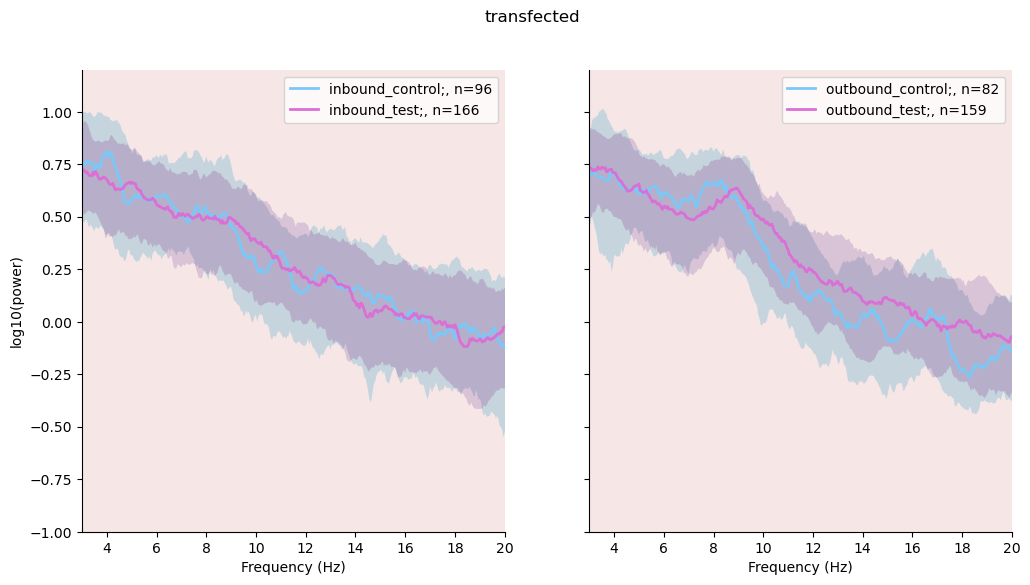

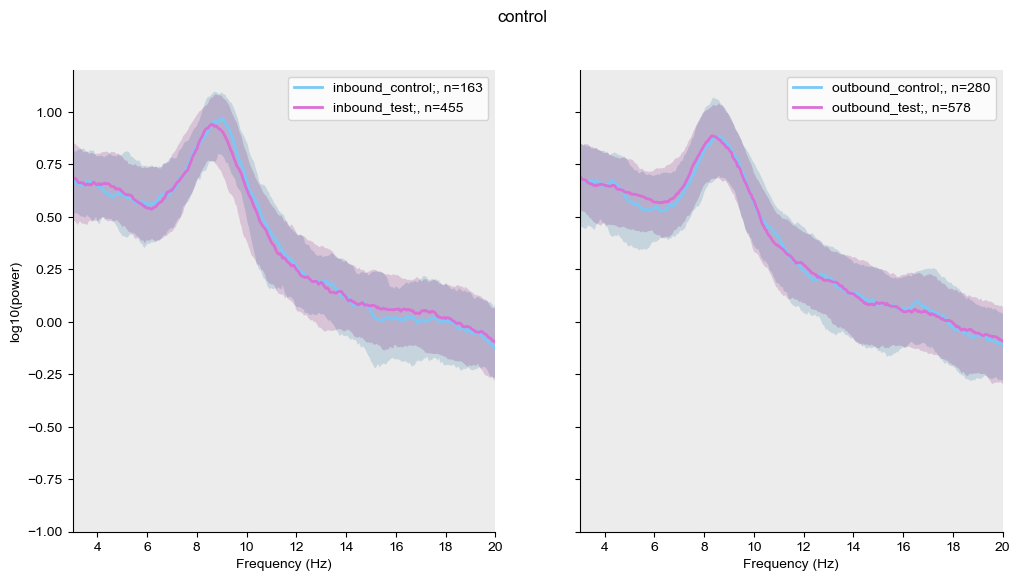

In [ ]:
track_type = "early_wtrack"
# track_type = "lineartrack"
window_size = 500
max_trial_length = 20
run_filter = 10
clip_distance = 10
smooth_distance = 0
weighted = False
plot_log = True
encoding_tag = ""  # "_opto_test_interval"
dlc_pos = True
filter_valid_times = True
filter_track = False

# # for individual animals
# animal_list = animal_style.index
# animal_list = [x for x in animal_list if x not in ["control", "transfected"]]
# for groups
animal_list = ["transfected", "control"]

missing_clusterless = []
missing_ahead_behind = []
missing_valid_times = []
compiled_results = {}

decode_filter_query = BadDecodes()  # & {"bad_decodes": False}
for animal in animal_list:
    if animal in [
        "Banner",
        "Odins",
        "Dan",
    ]:
        continue
    dataset_key = {"animal": animal, "track_type": track_type, "targeted_phase": 90}

    # get the keys for the data we're analyzing
    dataset = filter_opto_data(dataset_key)
    key_pairs = []
    for key in dataset.proj(position_interval_name="interval_list_name").fetch("KEY"):

        trial_keys = (
            TrialIntervals()
            * (TaskEpoch * (PositionIntervalMap() & key)).proj(
                waveform_features_group_name="interval_list_name"
            )
        ).fetch("nwb_file_name", "epoch", "waveform_features_group_name", as_dict=True)
        # if not len(trial_keys):
        #     print("No trial keys", key)
        #     continue

        pos_group_name = (
            "DLC " + key["position_interval_name"]
            if dlc_pos
            else key["position_interval_name"]
        )
        if not (
            query := (
                ClusterlessDecodingV1()
                & {
                    "nwb_file_name": key["nwb_file_name"],
                    "position_group_name": pos_group_name,
                    "encoding_interval": key["position_interval_name"] + encoding_tag,
                }
            )
        ):
            print("No clusterless decoding", key)
            missing_clusterless.append(key)
            continue
        clusterless_keys = [query.fetch1("KEY") for k in trial_keys]

        opto_key = key.copy()
        opto_key["interval_list_name"] = opto_key.pop("position_interval_name")
        key_pairs.append((trial_keys, clusterless_keys, opto_key))

    spectrum_results = {}

    # run analysis across key sets
    for i in range(len(key_pairs)):
        trial_key, clusterless_key, opto_key = key_pairs[i]

        outbound_intervals = (TrialIntervals() & trial_key).fetch1(
            "outbound_trial_intervals"
        )
        inbound_intervals = (TrialIntervals() & trial_key).fetch1(
            "inbound_trial_intervals"
        )

        control_intervals, test_intervals = (OptoStimProtocol() & opto_key).fetch1(
            "control_intervals", "test_intervals"
        )

        if not (ClusterlessAheadBehindDistance() & clusterless_key):
            print("No ahead behind distance", clusterless_key)
            missing_ahead_behind.append(clusterless_key)
            continue
        ahead_behind = np.squeeze(
            (ClusterlessAheadBehindDistance() & clusterless_key)
            .fetch1_dataframe()
            .values
        )
        if clip_distance:
            ahead_behind = np.clip(ahead_behind, -clip_distance, clip_distance)
        if smooth_distance:
            ahead_behind = smooth(
                ahead_behind, smooth_distance * 3, smooth_distance, hamming=True
            )
        results = (ClusterlessDecodingV1() & clusterless_key).fetch_results()
        ahead_behind.shape, results.time.shape

        run_intervals = get_running_valid_intervals(
            opto_key, filter_speed=run_filter, seperate_optogenetics=False, dlc_pos=True
        )
        run_intervals = np.array(run_intervals)

        if filter_valid_times:
            query_valid = ClusterlessValidDecodeTimes() & clusterless_key
            if not query_valid:
                print("No valid times entry", clusterless_key)
                missing_valid_times.append(clusterless_key)
                continue
            opto_valid, control_valid = query_valid.fetch1(
                "opto_valid_decode_times", "control_valid_decode_times"
            )
            valid_intervals = interval_list_union(
                np.array(opto_valid), np.array(control_valid)
            )
            if valid_intervals.size == 0:
                print("No valid intervals", clusterless_key)
                continue
            run_intervals = interval_list_intersect(
                np.array(run_intervals), valid_intervals
            )
            # run_intervals = interval_list_intersect(np.array(run_intervals), np.array(control_valid))

        if filter_track:
            track_key = {
                "nwb_file_name": clusterless_key[0]["nwb_file_name"],
                "decode_group_name": key[
                    "position_interval_name"
                ],  # clusterless_key[0]["position_group_name"],
            }
            query = TrackCellCoverage() & track_key
            if not query:
                print("No track_coverage results", clusterless_key)
                continue
            good_track_times = query.fetch_good_coverage_times()

        for opto_interval, opto_type in zip(
            [control_intervals, test_intervals], ["control", "test"]
        ):
            for trial_list, trial_type in zip(
                [outbound_intervals, inbound_intervals],
                ["outbound", "inbound"],
            ):
                if not len(trial_list):
                    continue
                interval_type = f"{trial_type}_{opto_type}"
                interval_list = interval_list_intersect(
                    np.array(trial_list), np.array(opto_interval)
                )
                if not len(interval_list):
                    continue

                if run_filter:
                    interval_list = interval_list_intersect(
                        interval_list, run_intervals
                    )
                if filter_track:
                    interval_list = interval_list_intersect(
                        interval_list, good_track_times
                    )
                    if not len(interval_list):
                        continue

                spectrums = []
                weights = []

                for interval in interval_list:
                    rng = np.digitize(interval, results.time)
                    if rng[1] - rng[0] < window_size:
                        continue
                    if interval[1] - interval[0] > max_trial_length:
                        continue
                    f, power, weight = power_spectrum(
                        data=ahead_behind[rng[0] : rng[1]],
                        window_size=window_size,
                        sampling_rate=500,
                    )
                    spectrums.append(power)
                    weights.append(weight)
                spectrums = np.array(spectrums)
                weights = np.array(weights)

                if interval_type not in spectrum_results:
                    spectrum_results[interval_type] = {"spectrums": [], "weights": []}
                # if
                assert spectrums.shape[0] == weights.shape[0]
                spectrum_results[interval_type]["spectrums"].extend(spectrums)
                spectrum_results[interval_type]["weights"].extend(weights)

        # break

    # plot the results
    if not spectrum_results:
        continue
    compiled_results[animal] = spectrum_results
    fig, ax_list = plt.subplots(ncols=2, figsize=(12, 6), sharex=True, sharey=True)
    for name, result in spectrum_results.items():
        if "control" in name:
            color = interval_style["control"]
        else:
            color = interval_style["test"]
        if "inbound" in name:
            ax = ax_list[0]
        else:
            ax = ax_list[1]
        weights = np.array(result["weights"])
        if not (len(result["spectrums"])):
            continue
        power = result["spectrums"] * f
        if plot_log:
            power = np.log10(power)
        ind = np.logical_and(
            ~np.isnan(power).any(axis=1), ~np.isinf(power[:, 1:]).any(axis=1)
        )
        power = power[ind]

        if weighted:
            mid = np.average(power, axis=0, weights=weights[ind])
        else:
            mid = np.average(
                power,
                axis=0,
            )  # weights=weights)

        mid = np.array(
            [
                weighted_quantile(power[:, ii], 0.5, weights)
                for ii in range(power.shape[1])
            ]
        )
        low = np.array(
            [
                weighted_quantile(power[:, ii], 0.25, weights)
                for ii in range(power.shape[1])
            ]
        )
        high = np.array(
            [
                weighted_quantile(power[:, ii], 0.75, weights)
                for ii in range(power.shape[1])
            ]
        )
        ax.plot(
            f, mid, label=f"{name};, n={len(result['spectrums'])}", color=color, lw=2
        )
        ax.fill_between(f, low, high, alpha=0.2, facecolor=color)
        ax.fill_between(f, low, high, facecolor="white", zorder=-3)
        ax.fill_between(f, low, high, facecolor="grey", zorder=-1, alpha=0.3)

        ax.set_xlim(3, 20)
    ax_list[1].legend()
    fig.suptitle(animal)
    for a in ax_list:
        a.set_xlabel("Frequency (Hz)")
        a.legend()
        a.set_ylim(-1, 1.2)
        a.spines[["top", "right"]].set_visible(False)
    ylabel = "log10(power)" if plot_log else "power"
    ax_list[0].set_ylabel(ylabel)
    color = animal_style.loc[animal]["color"]
    for ax in ax_list:
        ax.fill_between([0, 25], -10, 10, facecolor=color, alpha=0.15, zorder=-10)
    plt.rcParams["font.family"] = "Arial"
    plt.rcParams["svg.fonttype"] = "none"
    fig.savefig(
        f"../Figures/Fig_4/Fig_4bf_ahead_behind_spectrum_task_separated_wtrack_{encoding_tag}_{animal}.svg"
    )

### Measurement of peak

inbound_control t=-6.079, p=0.00000
inbound_test t=-10.723, p=0.00000
outbound_control t=-3.485, p=0.00055
outbound_test t=-9.450, p=0.00000


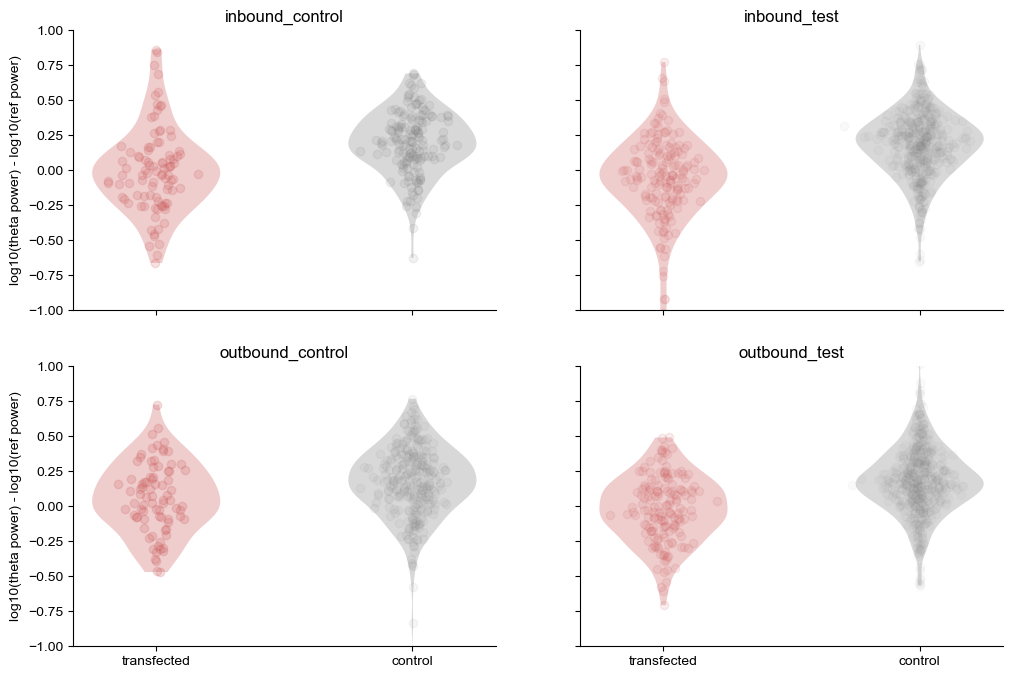

In [ ]:
ind_measure = np.logical_and(np.array(f) >= 6, np.array(f) <= 10)  # 6-10Hz
ind_ref = np.logical_or(
    np.logical_and(np.array(f) >= 2, np.array(f) < 6),
    np.logical_and(np.array(f) > 10, np.array(f) <= 14),
)


fig, ax = plt.subplots(nrows=2, ncols=2, sharex=True, sharey=True, figsize=(12, 8))

stats_tests = {}
for i, animal in enumerate(["transfected", "control"]):
    for j, trial_type in enumerate(["inbound", "outbound"]):
        for k, opto_type in enumerate(["control", "test"]):
            cond = f"{trial_type}_{opto_type}"
            x = compiled_results[animal][cond]
            data = np.array(x["spectrums"])

            from ms_stim_analysis.Analysis.utils import violin_scatter

            color = animal_style.loc[animal]["color"]
            # measure = data[:,ind_measure].mean(axis=1) / data[:,ind_ref].mean(axis=1)
            measure = np.log10(data[:, ind_measure]).mean(axis=1) - np.log10(
                data[:, ind_ref]
            ).mean(axis=1)
            violin_scatter(
                measure,
                color=color,
                pos=i,
                ax=ax[j, k],
            )
            ax[j, k].set_title(cond)
            ax[j, k].set_ylim(-1, 1)
            ax[j, k].spines[["top", "right"]].set_visible(False)

            if stats_tests.get(cond) is None:
                stats_tests[cond] = []
            stats_tests[cond].append(measure)

for a in ax[:, 0]:
    a.set_ylabel("log10(theta power) - log10(ref power)")

for a in ax[0, :]:
    a.set_xticks([0, 1])
    a.set_xticklabels(["transfected", "control"])

from scipy.stats import ttest_ind

for cond, vals in stats_tests.items():
    if len(vals) != 2:
        continue
    t, p = ttest_ind(vals[0], vals[1])
    print(f"{cond} t={t:.3f}, p={p:.5f}")

plt.rcParams["svg.fonttype"] = "none"

### Measurement of peak (single suplot)

inbound_control t=-6.079, p=0.00000
inbound_test t=-10.723, p=0.00000
outbound_control t=-3.485, p=0.00055
outbound_test t=-9.450, p=0.00000
inbound_control t=-6.079, p=0.00000
inbound_test t=-10.723, p=0.00000
outbound_control t=-3.485, p=0.00055
outbound_test t=-9.450, p=0.00000


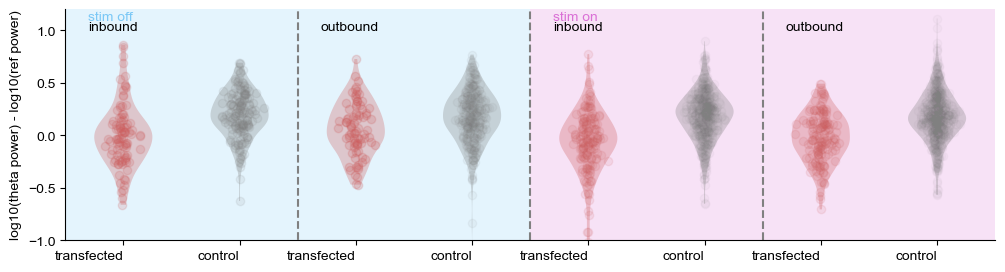

In [ ]:
ind_measure = np.logical_and(np.array(f) >= 6, np.array(f) <= 10)  # 6-10Hz
ind_ref = np.logical_or(
    np.logical_and(np.array(f) >= 2, np.array(f) < 6),
    np.logical_and(np.array(f) > 10, np.array(f) <= 14),
)


fig = plt.figure(figsize=(12, 3))
fontsize = 10
ax = fig.gca()


group_stats_tests = {
    trial_: {"control": [], "test": []} for trial_ in ["inbound", "outbound"]
}
ticks = []
labels = []
for i, animal in enumerate(["transfected", "control"]):
    for j, trial_type in enumerate(["inbound", "outbound"]):

        for k, opto_type in enumerate(["control", "test"]):
            cond = f"{trial_type}_{opto_type}"
            x = compiled_results[animal][cond]
            data = np.array(x["spectrums"])

            from ms_stim_analysis.Analysis.utils import violin_scatter

            color = animal_style.loc[animal]["color"]
            # measure = data[:,ind_measure].mean(axis=1) / data[:,ind_ref].mean(axis=1)
            measure = np.log10(data[:, ind_measure]).mean(axis=1) - np.log10(
                data[:, ind_ref]
            ).mean(axis=1)

            x_loc = k * 4 + j * 2 + i
            violin_scatter(
                measure,
                color=color,
                pos=x_loc,
                ax=ax,
            )
            ax.spines[["top", "right"]].set_visible(False)

            group_stats_tests[trial_type][opto_type].append(measure)
            ticks.append(x_loc)
            labels.append(f"{animal}")

ax.set_ylabel("log10(theta power) - log10(ref power)")
ax.fill_between(
    [-1, 3.5], -10, 10, facecolor=interval_style["control"], alpha=0.2, zorder=-10
)
ax.fill_between(
    [3.5, 8], -10, 10, facecolor=interval_style["test"], alpha=0.2, zorder=-10
)

plt.xlim(-0.5, 7.5)
ax.set_ylim(-1, 1.2)
plt.xticks(ticks, labels, rotation=0, ha="right", fontsize=fontsize)

ax.axvline(
    [
        1.5,
    ],
    -1,
    1,
    color="grey",
    linestyle="--",
)
ax.axvline(
    [
        3.5,
    ],
    color="grey",
    linestyle="--",
)
ax.axvline(
    [
        5.5,
    ],
    color="grey",
    linestyle="--",
)

for xx in [0, 4]:
    plt.text(xx - 0.3, 1.0, "inbound", fontsize=fontsize)
for xx in [2, 6]:
    plt.text(xx - 0.3, 1.0, "outbound", fontsize=fontsize)

plt.text(-0.3, 1.1, "stim off", color=interval_style["control"], fontsize=fontsize)
plt.text(4 - 0.3, 1.1, "stim on", color=interval_style["test"], fontsize=fontsize)

for trial_type in group_stats_tests:
    for opto_type in group_stats_tests[trial_type]:
        measure = group_stats_tests[trial_type][opto_type]
        pval = ttest_ind(*measure)
        print(f"{trial_type}_{opto_type} t={pval.statistic:.3f}, p={pval.pvalue:.5f}")

# for a in ax[0, :]:
#     a.set_xticks([0, 1])
#     a.set_xticklabels(["transfected", "control"])

from scipy.stats import ttest_ind

for cond, vals in stats_tests.items():
    if len(vals) != 2:
        continue
    t, p = ttest_ind(vals[0], vals[1])
    print(f"{cond} t={t:.3f}, p={p:.5f}")

plt.rcParams["svg.fonttype"] = "none"
fig.savefig(f"../Figures/Fig_4/Fig_4i_ahead_behind_power_quant.svg")

### Measurement of peak Mixed Linear Model

In [28]:
# group_stats_tests = {
#     trial_: {"control": [], "test": []} for trial_ in ["inbound", "outbound"]
# }
# ticks = []
# labels = []
animal_list = list(compiled_results.keys())
animal_list = [_ for _ in animal_list if _ not in ["control", "transfected"]]

ind_measure = np.logical_and(np.array(f) >= 6, np.array(f) <= 10)  # 6-10Hz
ind_ref = np.logical_or(
    np.logical_and(np.array(f) >= 2, np.array(f) < 6),
    np.logical_and(np.array(f) > 10, np.array(f) <= 14),
)

model_df = []
for i, animal in enumerate(animal_list):
    for j, trial_type in enumerate(["inbound", "outbound"]):
        for k, opto_type in enumerate(["control", "test"]):
            cond = f"{trial_type}_{opto_type}"
            x = compiled_results[animal][cond]
            data = np.array(x["spectrums"])
            measure = np.log10(data[:, ind_measure]).mean(axis=1) - np.log10(
                data[:, ind_ref]
            ).mean(axis=1)
            # group_stats_tests[trial_type][opto_type].append(measure)

            model_df.extend(
                [
                    {
                        "Animal": animal,
                        "Trial": trial_type,
                        "Interval": opto_type,
                        "Treatment": (
                            "transfected"
                            if animal_style.loc[animal, "background"] == "indianred"
                            else "control"
                        ),
                        "Measure": m,
                    }
                    for m in measure
                ]
            )
            print
import pandas as pd

model_df = pd.DataFrame(model_df)

from statsmodels.formula.api import mixedlm

# Convert the 'Treatment' column to a categorical variable
model_df["Treatment"] = model_df["Treatment"].astype("category")
model_df["Interval"] = model_df["Interval"].astype("category")
model_df["Trial"] = model_df["Trial"].astype("category")

# Fit the mixed-effects model
model = mixedlm("Measure ~ Treatment * Interval ", model_df, groups=model_df["Animal"])
result = model.fit()

# Print the summary of the model
print(result.summary())

                       Mixed Linear Model Regression Results
Model:                       MixedLM           Dependent Variable:           Measure
No. Observations:            1856              Method:                       REML   
No. Groups:                  7                 Scale:                        0.0537 
Min. group size:             75                Log-Likelihood:               57.8458
Max. group size:             730               Converged:                    Yes    
Mean group size:             265.1                                                  
------------------------------------------------------------------------------------
                                          Coef.  Std.Err.   z    P>|z| [0.025 0.975]
------------------------------------------------------------------------------------
Intercept                                  0.094    0.064  1.458 0.145 -0.032  0.220
Treatment[T.transfected]                  -0.075    0.099 -0.757 0.449 -0.268  0.119
Inte

### Heirarchical bootstrap

In [ ]:
animal_groups = {
    "transfected": [
        "Winnie",
        "Totoro",
        "Frodo",
    ],
    "control": [
        "Yoshi",
        "Wallie",
        "Olive",
        "Bilbo",
    ],
}
from tqdm import tqdm

In [ ]:
n_boot = 10000


bootstrap_results = {}

for group, animals in animal_groups.items():
    bootstrap_results[group] = {}
    for trial_type in ["inbound", "outbound"]:
        for interval_type in ["control", "test"]:
            cond = f"{trial_type}_{interval_type}"

            m_ = []
            for _ in tqdm(range(n_boot), desc=f"Bootstrapping {group} {cond}"):
                animal_samples = np.random.choice(animals, len(animals), replace=True)
                spectrums = []
                weights = []
                for animal in animal_samples:
                    animal_spectrums = np.array(
                        compiled_results[animal][cond]["spectrums"]
                    )
                    animal_weights = np.array(compiled_results[animal][cond]["weights"])
                    spect_samples = np.random.choice(
                        len(animal_spectrums), len(animal_spectrums), replace=True
                    )
                    spectrums.extend(animal_spectrums[spect_samples])
                    weights.extend(animal_weights[spect_samples])
                spectrums = np.array(spectrums)
                weights = np.array(weights)
                measures = np.log10(spectrums[:, ind_measure]).mean(axis=1) - np.log10(
                    spectrums[:, ind_ref]
                ).mean(axis=1)
                # m_.append(np.mean(measures, axis=0))
                m_.append(np.average(measures, axis=0, weights=weights))
            m_ = np.array(m_)
            bootstrap_results[group][cond] = m_

Bootstrapping control outbound_test: 100%|██████████| 10000/10000 [02:21<00:00, 70.92it/s]


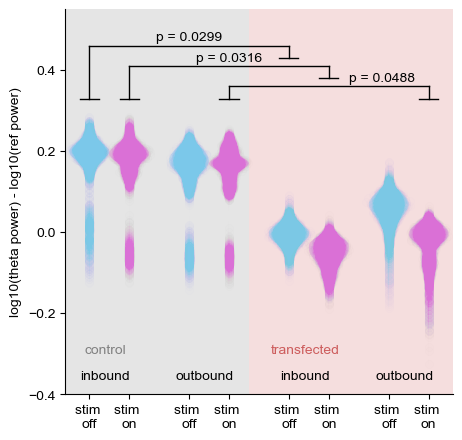

In [ ]:
ticks = []
labels = []
from Analysis.utils import violin_scatter

fig = plt.figure(figsize=(5, 5))
for i, group in enumerate(["control", "transfected"]):
    for j, cond in enumerate(bootstrap_results[group]):
        scores = bootstrap_results[group][cond]
        color = (
            interval_style["control"] if "control" in cond else interval_style["test"]
        )
        cond_name = "stim off" if cond == "control" else "stim on"
        xloc = 2.5 * i + j * 0.5 + (j // 2) * 0.25
        violin_scatter(scores, pos=[xloc], color=color)
        ticks.append(xloc)
        # labels.append(f"{cond.split('_')[0] if cond.split('_')[1] == 'control' else ' '} \n {cond.split('_')[1]}")
        labels.append("stim \non" if cond.split("_")[1] == "test" else "stim \noff")


def test_diff_of_bootstrap_dist(dist1, dist2):
    diff = np.subtract.outer(dist1, dist2)
    diff = np.ravel(diff)
    # standarize the sign of the difference
    if np.mean(diff) < 0:
        diff = -diff
    p_val = np.sum(diff < 0) / diff.size
    return p_val


global_shift = 0.09
# indicate sig difference
y_max = 0.42 - global_shift
y_bridge = 0.45 - global_shift
x1 = ticks[3]
x2 = ticks[7]
bar_rng = 0.12
plt.plot([x1, x2], [y_bridge, y_bridge], color="k", lw=1)
plt.plot([x1, x1], [y_max, y_bridge], color="k", lw=1)
plt.plot([x2, x2], [y_max, y_bridge], color="k", lw=1)
plt.plot([x1 - bar_rng, x1 + bar_rng], [y_max, y_max], color="k", lw=1)
plt.plot([x2 - bar_rng, x2 + bar_rng], [y_max, y_max], color="k", lw=1)
plt.text(
    x1 + (x2 - x1) * 0.6,
    y_bridge + 0.02,
    # "* p < 0.05",
    f"p = {transfection_p_vals[-1]:.4f}",
    ha="left",
    va="center",
    fontsize=10,
    color="k",
)

# indicate sig difference
y_max = 0.42 - global_shift, 0.47 - global_shift
y_bridge = 0.50 - global_shift
x1 = ticks[1]
x2 = ticks[5]
plt.plot([x1, x2], [y_bridge, y_bridge], color="k", lw=1)
plt.plot([x1, x1], [y_max[0], y_bridge], color="k", lw=1)
plt.plot([x2, x2], [y_max[1], y_bridge], color="k", lw=1)
plt.plot([x1 - bar_rng, x1 + bar_rng], [y_max[0], y_max[0]], color="k", lw=1)
plt.plot([x2 - bar_rng, x2 + bar_rng], [y_max[1], y_max[1]], color="k", lw=1)
plt.text(
    (x1 + x2) / 2,
    y_bridge + 0.02,
    # "* p < 0.05",
    f"p = {transfection_p_vals[1]:.4f}",
    ha="center",
    va="center",
    fontsize=10,
    color="k",
)

y_max = 0.42 - global_shift, 0.52 - global_shift
y_bridge = 0.55 - global_shift
x1 = ticks[0]
x2 = ticks[4]
plt.plot([x1, x2], [y_bridge, y_bridge], color="k", lw=1)
plt.plot([x1, x1], [y_max[0], y_bridge], color="k", lw=1)
plt.plot([x2, x2], [y_max[1], y_bridge], color="k", lw=1)
plt.plot([x1 - bar_rng, x1 + bar_rng], [y_max[0], y_max[0]], color="k", lw=1)
plt.plot([x2 - bar_rng, x2 + bar_rng], [y_max[1], y_max[1]], color="k", lw=1)
plt.text(
    (x1 + x2) / 2,
    y_bridge + 0.02,
    # "* p < 0.05",
    f"p = {transfection_p_vals[0]:.4f}",
    ha="center",
    va="center",
    fontsize=10,
    color="k",
)


plt.xticks(
    ticks,
    labels,
    rotation=0,
)
plt.ylabel(
    "log10(theta power) - log10(ref power)",
)
plt.xlim(-0.3, ticks[-1] + 0.3)

plt.fill_between(
    [-1, 2.0],
    -0.5,
    0.6,
    facecolor=animal_style.loc["control", "color"],
    alpha=0.2,
    zorder=-1,
)
plt.fill_between(
    [2.0, 10.25],
    -0.5,
    0.6,
    facecolor=animal_style.loc["transfected", "color"],
    alpha=0.2,
    zorder=-1,
)
plt.ylim(-0.4, 0.55)

fig.gca().spines[["top", "right"]].set_visible(False)

plt.rcParams["svg.fonttype"] = "none"
plt.rcParams["font.family"] = "Arial"

for loc in [ticks[0], ticks[4]]:
    plt.text(
        loc + 0.2,
        -0.37,
        "inbound",
        ha="center",
        va="bottom",
        fontsize=10,
    )
for loc in [ticks[2], ticks[6]]:
    plt.text(
        loc + 0.2,
        -0.37,
        "outbound",
        ha="center",
        va="bottom",
        fontsize=10,
    )

plt.text(
    ticks[4] + 0.2,
    -0.3,
    "transfected",
    ha="center",
    fontsize=10,
    color=animal_style.loc["transfected", "color"],
)
plt.text(
    ticks[0] + 0.2,
    -0.3,
    "control",
    ha="center",
    fontsize=10,
    color=animal_style.loc["control", "color"],
)
fig.savefig(
    "/home/sambray/Documents/MS_analysis_samsplaying/Figures202507/wtrack_decode_spectrum_score_heirarchical_bootstrap_correlation_coefficients.svg"
)

### Heirarchical merge all intervals

In [ ]:
n_boot = 10000
bootstrap_results = {}

for group, animals in animal_groups.items():
    # bootstrap_results[group] = {}
    # for trial_type in ["inbound", "outbound"]:
    #     for interval_type in ["control", "test"]:
    #         cond = f"{trial_type}_{interval_type}"

    m_ = []
    for _ in tqdm(range(n_boot), desc=f"Bootstrapping {group} {cond}"):
        animal_samples = np.random.choice(animals, len(animals), replace=True)
        spectrums = []
        weights = []
        for animal in animal_samples:
            animal_spectrums = np.concatenate(
                [
                    np.array(compiled_results[animal][cond]["spectrums"])
                    for cond in compiled_results[animal]
                ]
            )
            animal_weights = np.concatenate(
                [
                    np.array(compiled_results[animal][cond]["weights"])
                    for cond in compiled_results[animal]
                ]
            )
            spect_samples = np.random.choice(
                len(animal_spectrums), len(animal_spectrums), replace=True
            )
            spectrums.extend(animal_spectrums[spect_samples])
            weights.extend(animal_weights[spect_samples])
        spectrums = np.array(spectrums)
        weights = np.array(weights)
        measures = np.log10(spectrums[:, ind_measure]).mean(axis=1) - np.log10(
            spectrums[:, ind_ref]
        ).mean(axis=1)
        # m_.append(np.mean(measures, axis=0))
        m_.append(np.average(measures, axis=0, weights=weights))
    m_ = np.array(m_)
    bootstrap_results[group] = m_

Bootstrapping control outbound_test: 100%|██████████| 10000/10000 [11:37<00:00, 14.34it/s]


control mean: 0.165, std: 0.061
transfected mean: -0.019, std: 0.027


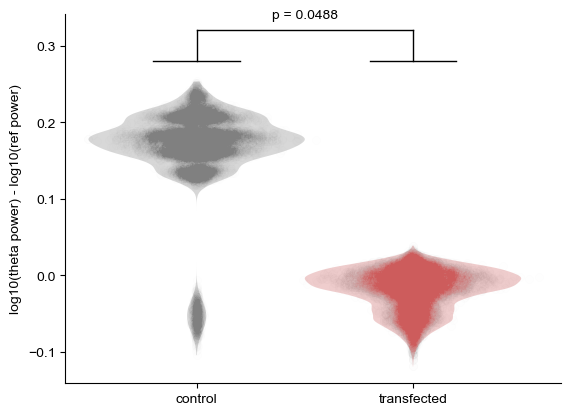

In [ ]:
fig = plt.figure()
for i, group in enumerate(["control", "transfected"]):
    print(
        f"{group} mean: {np.mean(bootstrap_results[group]):.3f}, std: {np.std(bootstrap_results[group]):.3f}"
    )
    violin_scatter(
        bootstrap_results[group], pos=[i / 2], color=animal_style.loc[group, "color"]
    )

plt.xticks([0, 0.5], ["control", "transfected"])
plt.ylabel("log10(theta power) - log10(ref power)")
fig.gca().spines[["top", "right"]].set_visible(False)
p_val = test_diff_of_bootstrap_dist(
    bootstrap_results["transfected"], bootstrap_results["control"]
)

global_shift = 0.09
# indicate sig difference
y_max = 0.28
y_bridge = 0.32
x1 = 0
x2 = 0.5
bar_rng = 0.1
plt.plot([x1, x2], [y_bridge, y_bridge], color="k", lw=1)
plt.plot([x1, x1], [y_max, y_bridge], color="k", lw=1)
plt.plot([x2, x2], [y_max, y_bridge], color="k", lw=1)
plt.plot([x1 - bar_rng, x1 + bar_rng], [y_max, y_max], color="k", lw=1)
plt.plot([x2 - bar_rng, x2 + bar_rng], [y_max, y_max], color="k", lw=1)
plt.text(
    x1 + (x2 - x1) * 0.5,
    y_bridge + 0.02,
    # "* p < 0.05",
    f"p = {transfection_p_vals[-1]:.4f}",
    ha="center",
    va="center",
    fontsize=10,
    color="k",
)

fig.savefig(
    "/home/sambray/Documents/MS_analysis_samsplaying/Figures202507/wtrack_decode_spectrum_score_heirarchical_bootstrap_POOLED.svg"
)

### Measurement of peak (inbound and outbound)

transfected_test t=-1.805, p=0.07163
control_test t=0.791, p=0.42916


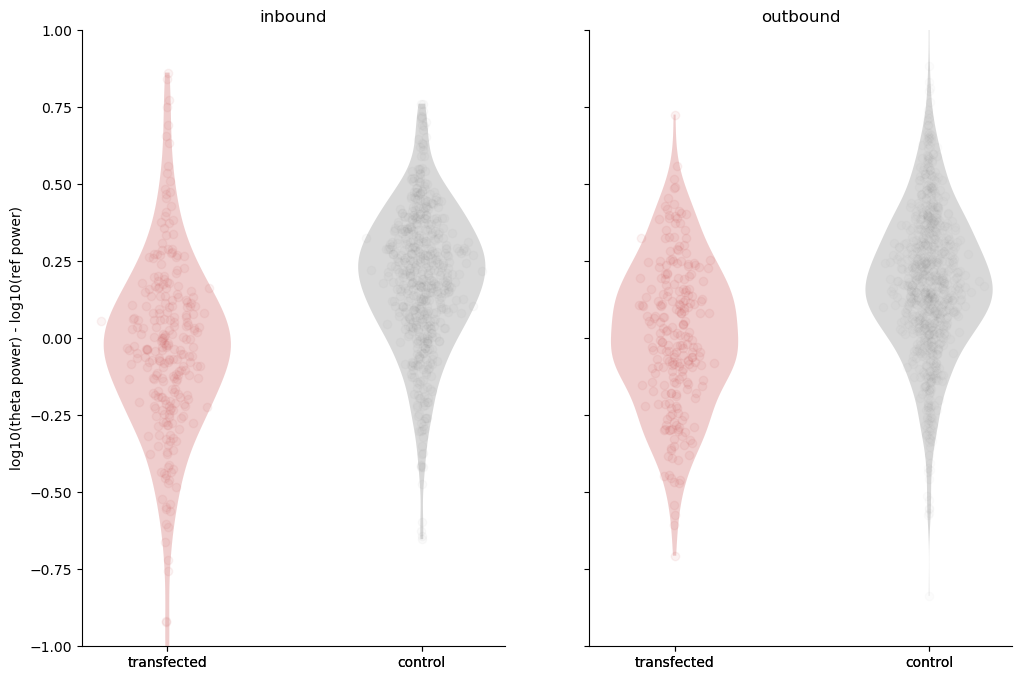

In [ ]:
encoding_tagind_measure = np.logical_and(np.array(f) >= 6, np.array(f) <= 10)  # 6-10Hz
ind_ref = np.logical_or(
    np.logical_and(np.array(f) >= 2, np.array(f) < 6),
    np.logical_and(np.array(f) > 10, np.array(f) <= 14),
)

plot_animals = ["transfected", "control"]
# plot_animals = [
#     a for a in compiled_results.keys() if a not in ["transfected", "control"]
# ]

fig, ax = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=True, figsize=(12, 8))
ax = ax[None, :]
stats_tests = {}

xloc = []
xlabels = []
for i, animal in enumerate(plot_animals):
    # for j, trial_type in enumerate(["inbound", "outbound"]):
    j = 0
    # for k, opto_type in enumerate(["control", "test"]):
    for k, trial_type in enumerate(["inbound", "outbound"]):
        data = []
        for opto_type in ["control", "test"]:
            cond = f"{trial_type}_{opto_type}"
            x = compiled_results[animal][cond]
            data.append(x["spectrums"])
        cond = f"{animal}_{opto_type}"
        data = np.concatenate(data, axis=0)

        from Analysis.utils import violin_scatter

        color = animal_style.loc[animal]["color"]
        measure = np.log10(data[:, ind_measure]).mean(axis=1) - np.log10(
            data[:, ind_ref]
        ).mean(axis=1)
        violin_scatter(
            measure,
            color=color,
            pos=i,
            ax=ax[j, k],
        )
        xloc.append(i)
        xlabels.append(animal)
        ax[j, k].set_title(trial_type)
        ax[j, k].set_ylim(-1, 1)
        ax[j, k].spines[["top", "right"]].set_visible(False)

        if stats_tests.get(cond) is None:
            stats_tests[cond] = []
        stats_tests[cond].append(measure)

for a in ax[:, 0]:
    a.set_ylabel("log10(theta power) - log10(ref power)")

for a in ax[0, :]:
    # a.set_xticks([0, 1])
    # a.set_xticklabels(["transfected", "control"])
    a.set_xticks(xloc)
    a.set_xticklabels(xlabels)

from scipy.stats import ttest_ind

for cond, vals in stats_tests.items():
    if len(vals) != 2:
        continue
    t, p = ttest_ind(vals[0], vals[1])
    print(f"{cond} t={t:.3f}, p={p:.5f}")

plt.rcParams["svg.fonttype"] = "none"
# fig.savefig(
#     f"./Figures_20241201/clusterless_ahead_behind_spectrum_task_separated_wtrack_{encoding_tag}_stats.pdf"
# )

# fig.savefig(
#     f"/home/sambray/Documents/MS_analysis_samsplaying/Plots/Figures_june2025/"
#     + "spectrum_stats_stim_merged.pdf"
# )

fig.savefig(
    f"/home/sambray/Documents/MS_analysis_samsplaying/Plots/Figures_june2025/"
    + "spectrum_stats_trials_merged_grouptransfections.pdf"
)

### Group by inbound/outbound, all animals in plot

In [7]:
compiled_results

{'Winnie': {'outbound_control': {'spectrums': [array([7.92531328e-01, 1.59121720e+00, 1.60958705e+00, ...,
           2.17679037e-04, 2.15212225e-04, 1.07190477e-04]),
    array([1.15928522e-01, 2.97900963e-01, 4.93180339e-01, ...,
           4.44768191e-04, 4.51262198e-04, 2.26723899e-04]),
    array([2.93133146e+00, 5.87751348e+00, 5.92178383e+00, ...,
           2.23543488e-04, 2.23055639e-04, 1.11446497e-04]),
    array([8.08827215e-01, 1.62238004e+00, 1.63640414e+00, ...,
           1.24513360e-04, 1.18390532e-04, 5.81791005e-05]),
    array([2.31267378e-01, 4.65780579e-01, 4.75488277e-01, ...,
           1.19637905e-04, 1.20201069e-04, 6.01945292e-05]),
    array([1.94056670e+00, 3.90125755e+00, 3.96072646e+00, ...,
           1.72121646e-03, 1.71876005e-03, 8.58982527e-04]),
    array([5.22341727e+00, 1.04808479e+01, 1.05822290e+01, ...,
           2.38433171e-03, 2.37653595e-03, 1.18693407e-03]),
    array([4.55722267e-01, 9.19141887e-01, 9.42006558e-01, ...,
           4.78864

transfected outbound_test 159
transfected inbound_test 166
control outbound_test 548
control inbound_test 406


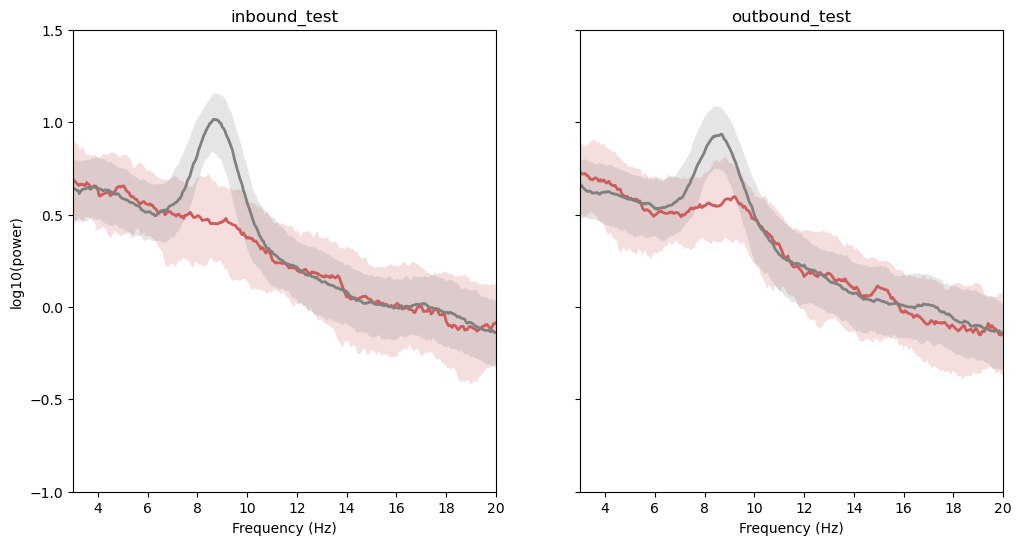

In [6]:
# plot the results

fig, ax_list = plt.subplots(ncols=2, figsize=(12, 6), sharex=True, sharey=True)

for animal, spectrum_results in compiled_results.items():
    if animal not in ["control", "transfected"]:
        continue

    for name, result in spectrum_results.items():
        # if "control" in name:
        #     color = interval_style["control"]
        # else:
        #     color = interval_style["test"]
        if "control" in name:
            continue
        color = animal_style.loc[animal]["color"]
        if "inbound" in name:
            ax = ax_list[0]
        else:
            ax = ax_list[1]
        ax.set_title(name)
        weights = np.array(result["weights"])
        if not (len(result["spectrums"])):
            continue
        power = result["spectrums"] * f
        print(f"{animal} {name} {len(result['spectrums'])}")
        if plot_log:
            power = np.log10(power)
        ind = np.logical_and(
            ~np.isnan(power).any(axis=1), ~np.isinf(power[:, 1:]).any(axis=1)
        )
        power = power[ind]

        if weighted:
            mid = np.average(power, axis=0, weights=weights[ind])
        else:
            mid = np.average(
                power,
                axis=0,
            )  # weights=weights)

        mid = np.array(
            [
                weighted_quantile(power[:, ii], 0.5, weights)
                for ii in range(power.shape[1])
            ]
        )
        low = np.array(
            [
                weighted_quantile(power[:, ii], 0.25, weights)
                for ii in range(power.shape[1])
            ]
        )
        high = np.array(
            [
                weighted_quantile(power[:, ii], 0.75, weights)
                for ii in range(power.shape[1])
            ]
        )
        ax.plot(
            f, mid, label=f"{name};, n={len(result['spectrums'])}", color=color, lw=2
        )
        ax.fill_between(f, low, high, alpha=0.2, facecolor=color)

        ax.set_xlim(3, 20)
    # ax_list[1].legend()
    # fig.suptitle(animal)
for a in ax_list:
    a.set_xlabel("Frequency (Hz)")
    # a.legend()
    a.set_ylim(-1, 1.5)
ylabel = "log10(power)" if plot_log else "power"
ax_list[0].set_ylabel(ylabel)
plt.rcParams["svg.fonttype"] = "none"
# fig.savefig(
#     f"./Figures_20241201/clusterless_ahead_behind_spectrum_task_separated_animal_grouped_wtrack_.svg"
# )

# Run and optogenetic intervals:

In [2]:
# # # Logging for database export. Not necessary for replication

from spyglass.common.common_usage import Export, ExportSelection

paper_key = {"paper_id": "ms_stim_analysis"}

analysis_id = "ahead_behind_spectrum_linear"
# (ExportSelection() & {**paper_key, "analysis_id": analysis_id}).delete()

ExportSelection().start_export(**paper_key, analysis_id=analysis_id)

[09:34:36][INFO] Spyglass: Resuming {'export_id': 45}


datasets: 5
No clusterless decoding {'nwb_file_name': 'Winnie20220713_.nwb', 'position_interval_name': 'pos 13 valid times', 'dio_event_name': 'stim', 'opto_infer_params_name': 'default_pulse_train'}
No decoding results found {'nwb_file_name': 'Totoro20220602_.nwb', 'waveform_features_group_name': '14_lineartrack', 'position_group_name': 'pos 13 valid times', 'decoding_param_name': 'ms_lineartrack_contfrag_clusterless_causal', 'encoding_interval': 'pos 13 valid times', 'decoding_interval': 'pos 13 valid times', 'estimate_decoding_params': 0}
No decoding results found {'nwb_file_name': 'Totoro20220603_.nwb', 'waveform_features_group_name': '14_lineartrack', 'position_group_name': 'pos 13 valid times', 'decoding_param_name': 'ms_lineartrack_contfrag_clusterless_causal', 'encoding_interval': 'pos 13 valid times', 'decoding_interval': 'pos 13 valid times', 'estimate_decoding_params': 0}


[10:35:39][WARNING] Spyglass: DEPRECATION scheduled for Spyglass 0.6.0: interval_list_intersect
	Use Interval.intersect instead


linear_limits [10, 126.8923664781934]


[10:35:39][WARNING] Spyglass: DEPRECATION scheduled for Spyglass 0.6.0: interval_list_intersect
	Use Interval.intersect instead
[10:35:39][WARNING] Spyglass: DEPRECATION scheduled for Spyglass 0.6.0: interval_list_intersect
	Use Interval.intersect instead
[10:35:39][WARNING] Spyglass: DEPRECATION scheduled for Spyglass 0.6.0: interval_list_intersect
	Use Interval.intersect instead
[10:35:39][WARNING] Spyglass: DEPRECATION scheduled for Spyglass 0.6.0: interval_list_intersect
	Use Interval.intersect instead
[10:36:26][WARNING] Spyglass: DEPRECATION scheduled for Spyglass 0.6.0: interval_list_intersect
	Use Interval.intersect instead


linear_limits [10, 126.8923664781934]


[10:36:27][WARNING] Spyglass: DEPRECATION scheduled for Spyglass 0.6.0: interval_list_intersect
	Use Interval.intersect instead
[10:36:27][WARNING] Spyglass: DEPRECATION scheduled for Spyglass 0.6.0: interval_list_intersect
	Use Interval.intersect instead
[10:36:27][WARNING] Spyglass: DEPRECATION scheduled for Spyglass 0.6.0: interval_list_intersect
	Use Interval.intersect instead
[10:36:27][WARNING] Spyglass: DEPRECATION scheduled for Spyglass 0.6.0: interval_list_intersect
	Use Interval.intersect instead


datasets: 9
No clusterless decoding {'nwb_file_name': 'Olive20220702_.nwb', 'position_interval_name': 'pos 5 valid times', 'dio_event_name': 'stim', 'opto_infer_params_name': 'default_pulse_train'}
No clusterless decoding {'nwb_file_name': 'Olive20220702_.nwb', 'position_interval_name': 'pos 9 valid times', 'dio_event_name': 'stim', 'opto_infer_params_name': 'default_pulse_train'}


[10:37:32][WARNING] Spyglass: DEPRECATION scheduled for Spyglass 0.6.0: interval_list_intersect
	Use Interval.intersect instead


linear_limits [10, 123.30416347586447]


[10:37:32][WARNING] Spyglass: DEPRECATION scheduled for Spyglass 0.6.0: interval_list_intersect
	Use Interval.intersect instead
[10:37:32][WARNING] Spyglass: DEPRECATION scheduled for Spyglass 0.6.0: interval_list_intersect
	Use Interval.intersect instead
[10:37:32][WARNING] Spyglass: DEPRECATION scheduled for Spyglass 0.6.0: interval_list_intersect
	Use Interval.intersect instead
[10:37:32][WARNING] Spyglass: DEPRECATION scheduled for Spyglass 0.6.0: interval_list_intersect
	Use Interval.intersect instead
[10:38:17][WARNING] Spyglass: DEPRECATION scheduled for Spyglass 0.6.0: interval_list_intersect
	Use Interval.intersect instead


linear_limits [10, 126.8923664781934]


[10:38:18][WARNING] Spyglass: DEPRECATION scheduled for Spyglass 0.6.0: interval_list_intersect
	Use Interval.intersect instead
[10:38:18][WARNING] Spyglass: DEPRECATION scheduled for Spyglass 0.6.0: interval_list_intersect
	Use Interval.intersect instead
[10:38:18][WARNING] Spyglass: DEPRECATION scheduled for Spyglass 0.6.0: interval_list_intersect
	Use Interval.intersect instead
[10:38:18][WARNING] Spyglass: DEPRECATION scheduled for Spyglass 0.6.0: interval_list_intersect
	Use Interval.intersect instead
[10:39:02][WARNING] Spyglass: DEPRECATION scheduled for Spyglass 0.6.0: interval_list_intersect
	Use Interval.intersect instead


linear_limits [10, 126.8923664781934]


[10:39:03][WARNING] Spyglass: DEPRECATION scheduled for Spyglass 0.6.0: interval_list_intersect
	Use Interval.intersect instead
[10:39:03][WARNING] Spyglass: DEPRECATION scheduled for Spyglass 0.6.0: interval_list_intersect
	Use Interval.intersect instead
[10:39:03][WARNING] Spyglass: DEPRECATION scheduled for Spyglass 0.6.0: interval_list_intersect
	Use Interval.intersect instead
[10:39:03][WARNING] Spyglass: DEPRECATION scheduled for Spyglass 0.6.0: interval_list_intersect
	Use Interval.intersect instead
[10:39:50][WARNING] Spyglass: DEPRECATION scheduled for Spyglass 0.6.0: interval_list_intersect
	Use Interval.intersect instead


linear_limits [10, 126.8923664781934]


[10:39:51][WARNING] Spyglass: DEPRECATION scheduled for Spyglass 0.6.0: interval_list_intersect
	Use Interval.intersect instead
[10:39:51][WARNING] Spyglass: DEPRECATION scheduled for Spyglass 0.6.0: interval_list_intersect
	Use Interval.intersect instead
[10:39:51][WARNING] Spyglass: DEPRECATION scheduled for Spyglass 0.6.0: interval_list_intersect
	Use Interval.intersect instead
[10:39:51][WARNING] Spyglass: DEPRECATION scheduled for Spyglass 0.6.0: interval_list_intersect
	Use Interval.intersect instead
[10:40:41][WARNING] Spyglass: DEPRECATION scheduled for Spyglass 0.6.0: interval_list_intersect
	Use Interval.intersect instead


linear_limits [10, 126.8923664781934]


[10:40:42][WARNING] Spyglass: DEPRECATION scheduled for Spyglass 0.6.0: interval_list_intersect
	Use Interval.intersect instead
[10:40:42][WARNING] Spyglass: DEPRECATION scheduled for Spyglass 0.6.0: interval_list_intersect
	Use Interval.intersect instead
[10:40:42][WARNING] Spyglass: DEPRECATION scheduled for Spyglass 0.6.0: interval_list_intersect
	Use Interval.intersect instead
[10:40:42][WARNING] Spyglass: DEPRECATION scheduled for Spyglass 0.6.0: interval_list_intersect
	Use Interval.intersect instead
[10:41:32][WARNING] Spyglass: DEPRECATION scheduled for Spyglass 0.6.0: interval_list_intersect
	Use Interval.intersect instead


linear_limits [10, 126.8923664781934]


[10:41:32][WARNING] Spyglass: DEPRECATION scheduled for Spyglass 0.6.0: interval_list_intersect
	Use Interval.intersect instead
[10:41:32][WARNING] Spyglass: DEPRECATION scheduled for Spyglass 0.6.0: interval_list_intersect
	Use Interval.intersect instead
[10:41:32][WARNING] Spyglass: DEPRECATION scheduled for Spyglass 0.6.0: interval_list_intersect
	Use Interval.intersect instead
[10:41:32][WARNING] Spyglass: DEPRECATION scheduled for Spyglass 0.6.0: interval_list_intersect
	Use Interval.intersect instead
[10:42:22][WARNING] Spyglass: DEPRECATION scheduled for Spyglass 0.6.0: interval_list_intersect
	Use Interval.intersect instead


linear_limits [10, 126.8923664781934]


[10:42:23][WARNING] Spyglass: DEPRECATION scheduled for Spyglass 0.6.0: interval_list_intersect
	Use Interval.intersect instead
[10:42:23][WARNING] Spyglass: DEPRECATION scheduled for Spyglass 0.6.0: interval_list_intersect
	Use Interval.intersect instead
[10:42:23][WARNING] Spyglass: DEPRECATION scheduled for Spyglass 0.6.0: interval_list_intersect
	Use Interval.intersect instead
[10:42:23][WARNING] Spyglass: DEPRECATION scheduled for Spyglass 0.6.0: interval_list_intersect
	Use Interval.intersect instead


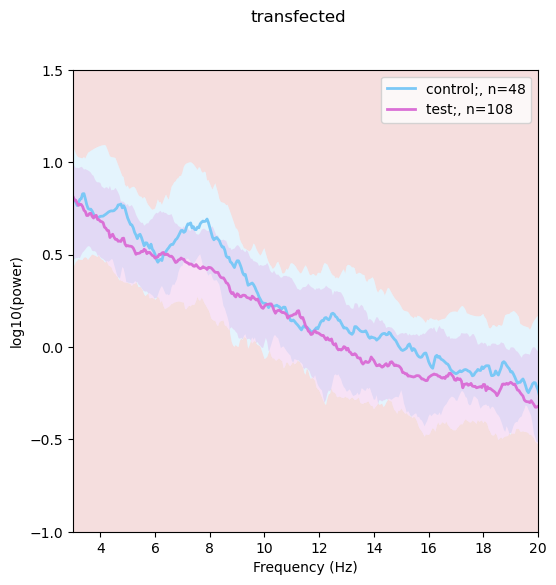

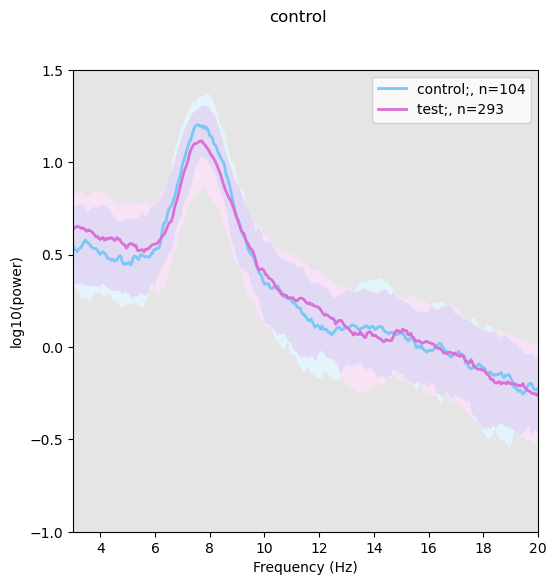

In [ ]:
# track_type = "early_wtrack"
track_type = "lineartrack"
window_size = 500
max_trial_length = 20
run_filter = 10
clip_distance = 10
smooth_distance = 0
weighted = False
plot_log = True
encoding_tag = ""  # _opto_test_interval"
dlc_pos = "wtrack" in track_type
filter_track = True

base_key = {
    "track_type": track_type,
    # "targeted_phase": 90,
    "period_ms": 50,
    "min_pulse_length": 20,
}

# individual animals
animal_list = animal_style.index
# grouped animals
animal_list = ["transfected", "control"]

missing_clusterless = []
missing_ahead_behind = []
compiled_results = {}
for animal in animal_list:
    if animal in ["Banner", "Odins", "Dan"]:
        continue
    dataset_key = {"animal": animal, **base_key}

    # get the keys for the data we're analyzing
    dataset = filter_opto_data(dataset_key)
    key_pairs = []
    for key in dataset.proj(position_interval_name="interval_list_name").fetch("KEY"):
        pos_group_name = (
            "DLC " + key["position_interval_name"]
            if dlc_pos
            else key["position_interval_name"]
        )
        if not (
            query := (
                ClusterlessDecodingV1()
                & dj.AndList(
                    [
                        {"nwb_file_name": key["nwb_file_name"]},
                        {"position_group_name": pos_group_name},
                        f"encoding_interval LIKE '%valid times{encoding_tag}'",
                        "decoding_param_name LIKE '%causal'",
                    ]
                )
            )
        ):
            print("No clusterless decoding", key)
            missing_clusterless.append(key)
            continue
        clusterless_keys = query.fetch1("KEY")
        opto_key = key.copy()
        opto_key["interval_list_name"] = opto_key.pop("position_interval_name")
        key_pairs.append((clusterless_keys, opto_key))
    spectrum_results = {}

    # run analysis across key sets
    for i in range(len(key_pairs)):
        clusterless_key, opto_key = key_pairs[i]

        control_intervals, test_intervals = (OptoStimProtocol() & opto_key).fetch1(
            "control_intervals", "test_intervals"
        )

        if not (ClusterlessAheadBehindDistance() & clusterless_key):
            print("No ahead behind distance", clusterless_key)
            missing_ahead_behind.append(clusterless_key)
            continue
        ahead_behind = np.squeeze(
            (ClusterlessAheadBehindDistance() & clusterless_key)
            .fetch1_dataframe()
            .values
        )
        if clip_distance:
            ahead_behind = np.clip(ahead_behind, -clip_distance, clip_distance)
        if smooth_distance:
            ahead_behind = smooth(
                ahead_behind, smooth_distance * 3, smooth_distance, hamming=True
            )
        try:
            results = (ClusterlessDecodingV1() & clusterless_key).fetch_results()
        except FileNotFoundError:
            print("No decoding results found", clusterless_key)
            missing_ahead_behind.append(clusterless_key)
            continue
        ahead_behind.shape, results.time.shape

        run_intervals = get_running_valid_intervals(
            opto_key,
            filter_speed=run_filter,
            seperate_optogenetics=False,
            dlc_pos=dlc_pos,
        )
        run_intervals = np.array(run_intervals)

        if filter_track:
            track_key = {
                "nwb_file_name": clusterless_key["nwb_file_name"],
                "decode_group_name": clusterless_key["position_group_name"],
            }
            query = TrackCellCoverage() & track_key
            if not query:
                print("No track_coverage results", clusterless_key)
                continue
            good_track_times = query.fetch_good_coverage_times()

        for opto_interval, opto_type in zip(
            [control_intervals, test_intervals], ["control", "test"]
        ):
            interval_type = opto_type
            interval_list = np.array(opto_interval)
            if not len(interval_list):
                continue

            if run_filter:
                interval_list = interval_list_intersect(
                    interval_list,
                    run_intervals,
                )
            if filter_track:
                interval_list = interval_list_intersect(
                    interval_list,
                    good_track_times,
                )

            spectrums = []
            weights = []

            for interval in interval_list:
                rng = np.digitize(interval, results.time)
                if rng[1] - rng[0] < window_size:
                    continue
                if interval[1] - interval[0] > max_trial_length:
                    continue
                f, power, weight = power_spectrum(
                    data=ahead_behind[rng[0] : rng[1]],
                    window_size=window_size,
                    sampling_rate=500,
                )
                spectrums.append(power)
                weights.append(weight)
            spectrums = np.array(spectrums)
            weights = np.array(weights)

            if interval_type not in spectrum_results:
                spectrum_results[interval_type] = {"spectrums": [], "weights": []}
            # if
            assert spectrums.shape[0] == weights.shape[0]
            spectrum_results[interval_type]["spectrums"].extend(spectrums)
            spectrum_results[interval_type]["weights"].extend(weights)
        # break

    # plot the results
    if not spectrum_results:
        continue
    compiled_results[animal] = spectrum_results
    fig, ax = plt.subplots(ncols=1, figsize=(6, 6), sharex=True, sharey=True)
    for name, result in spectrum_results.items():
        if "control" in name:
            color = interval_style["control"]
        else:
            color = interval_style["test"]

        weights = np.array(result["weights"])
        power = result["spectrums"] * f
        if plot_log:
            power = np.log10(power)
        ind = np.logical_and(
            ~np.isnan(power).any(axis=1), ~np.isinf(power[:, 1:]).any(axis=1)
        )
        power = power[ind]

        if weighted:
            mid = np.average(power, axis=0, weights=weights[ind])
        else:
            mid = np.average(
                power,
                axis=0,
            )  # weights=weights)

        mid = np.array(
            [
                weighted_quantile(power[:, ii], 0.5, weights)
                for ii in range(power.shape[1])
            ]
        )
        low = np.array(
            [
                weighted_quantile(power[:, ii], 0.25, weights)
                for ii in range(power.shape[1])
            ]
        )
        high = np.array(
            [
                weighted_quantile(power[:, ii], 0.75, weights)
                for ii in range(power.shape[1])
            ]
        )
        ax.plot(
            f, mid, label=f"{name};, n={len(result['spectrums'])}", color=color, lw=2
        )
        ax.fill_between(f, low, high, facecolor="white", zorder=-1)
        ax.fill_between(f, low, high, alpha=0.2, facecolor=color)

        ax.set_xlim(3, 20)
    ax.legend()
    fig.suptitle(animal)

    ax.set_xlabel("Frequency (Hz)")
    ax.legend()
    ax.set_ylim(-1, 1.5)
    ylabel = "log10(power)" if plot_log else "power"
    ax.set_ylabel(ylabel)
    color = animal_style.loc[animal]["color"]
    ax.fill_between([0, 25], -10, 10, facecolor=color, alpha=0.2, zorder=-10)

    if "targeted_phase" in base_key:
        fig.savefig(
            f"../Figures/Fig_S4/Fig_S4_{animal}_animals_targeted_phase_{base_key['targeted_phase']}_{track_type}.svg"
        )
    else:
        fig.savefig(
            f"../Figures/Fig_S4/Fig_S4_{animal}_animals_period_{base_key['period_ms']}ms_{track_type}.svg"
        )